A coffee business wants to boost revenue and optimize operations, but currently lacks insight into its sales behavior. Without understanding which products sell best, when most sales occur, or how payment preferences shift, they can’t make smart decisions on inventory, marketing, or pricing.

By analyzing this dataset, the company can:  Plan inventory better (avoid waste, stock popular items)  Target promotions during slow sales periods  Understand customer preferences (e.g., card vs. cash)  Forecast future sales for growth planning.



In [83]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

This dataset consists of two CSV files that together capture transactional coffee sales data from a vending machine system. The files complement each other by storing transaction-level details and product-level information, enabling detailed sales and revenue analysis. Columns Description:

date — Date of the transaction

datetime — Exact timestamp of the transaction

cash_type — Payment method used (Cash / Card)

card — Anonymized card identifier (only for card payments)

money — Amount paid for the transaction

coffee_name — Name of the coffee beverage purchased

In [84]:
data = pd.read_csv("coffee.csv")
data.head(4)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano


In [85]:
data.tail(4)

,date,datetime,cash_type,card,money,coffee_name
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte


In [86]:
data["cash_type"].value_counts()


cash_type
card    3547
cash      89
Name: count, dtype: int64

In [87]:
data.duplicated().sum()

0

In [88]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["time"] = data["datetime"].dt.time
data.head()

,date,datetime,cash_type,card,money,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000


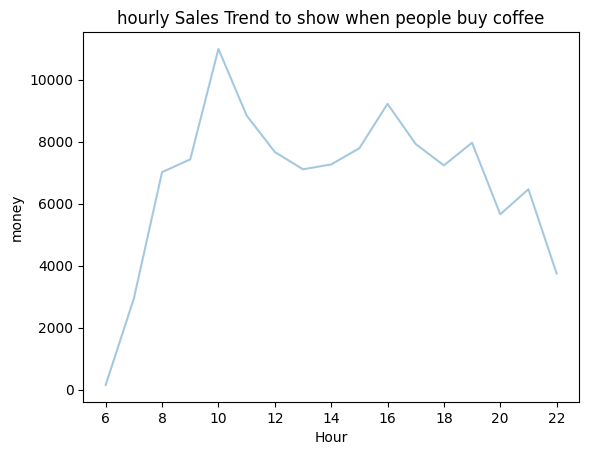

In [89]:
#  hourly sales  
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
hourly_sales = (data.groupby('hour')['money'].sum().reset_index())
plt.plot(hourly_sales['hour'], hourly_sales['money'], alpha=0.4, label='hourly Sales')
plt.title('hourly Sales Trend to show when people buy coffee')
plt.xlabel("Hour")
plt.ylabel("money")
plt.show()


The analysis shows that sales peak between 10:00 and 11:00 AM, indicating a strong mid-morning demand for coffee. This time window likely represents a routine break period, making it a critical hour for maximizing availability and minimizing downtime. Additionally, there is seasonality in the patterns, and the trend initially increases and then decreases after the 10th hour.

In [90]:
data["month_name"] = data["datetime"].dt.month_name()
month_order = ["January", "February","March","April","May","June","July","August","September","October","November","December"]
data["month_name"]=pd.Categorical(data["month_name"],categories = month_order,ordered = True)
payment_monthly = data.groupby(["month_name","cash_type"])["money"].sum().unstack(fill_value=0)
payment_monthly

C:\Users\Ayush Kumar\AppData\Local\Temp\ipykernel_9632\3322944491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_monthly = data.groupby(["month_name","cash_type"])["money"].sum().unstack(fill_value=0)


cash_type,card,cash
month_name,,
January,6398.86,0.0
February,13215.48,0.0
March,15891.64,1145.0
April,5719.56,1001.0
May,8164.42,899.0
June,7617.76,141.0
July,6915.94,0.0
August,7613.84,0.0
September,9988.64,0.0


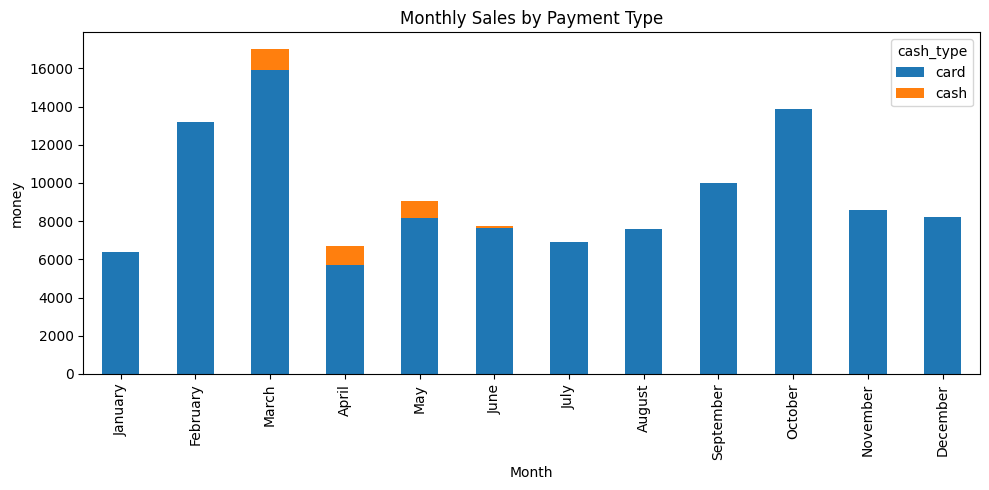

In [91]:
payment_monthly.plot(kind = "bar",stacked = True,figsize=(10,5))
plt.title("Monthly Sales by Payment Type")
plt.xlabel("Month")
plt.ylabel("money")
plt.tight_layout()
plt.show()

In [93]:
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'time',
       'hour', 'month_name'],
      dtype='object')

In [95]:

data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.day_name()
data[['date', 'weekday']].head()



,date,weekday
0,2024-03-01,Friday
1,2024-03-01,Friday
2,2024-03-01,Friday
3,2024-03-01,Friday
4,2024-03-01,Friday


In [96]:
weekday_order = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

weekly_sales = (
    data.groupby('weekday')['money']
    .sum()
    .reindex(weekday_order, fill_value=0)
)

weekly_sales


weekday
Monday       17925.10
Tuesday      18637.38
Wednesday    16093.46
Thursday     16477.40
Friday       17257.66
Saturday     15182.52
Sunday       13858.06
Name: money, dtype: float64

<Axes: title={'center': 'Weekly Sales Distribution'}, xlabel='weekday'>

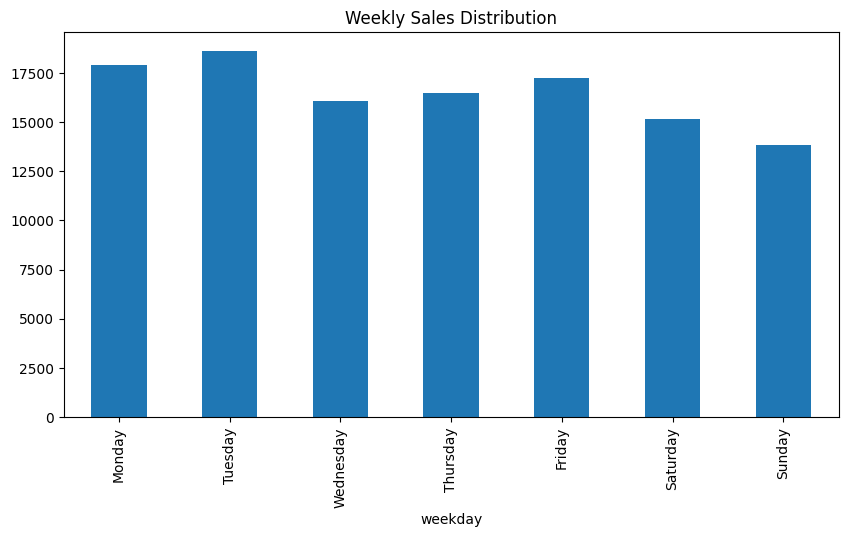

In [97]:
weekly_sales.plot(kind='bar', figsize=(10,5),title="Weekly Sales Distribution")

In [98]:
weekly_sales.max()

18637.38

In [ ]:
data.drop("datetime",axis=1,inplace=True)
data.head()

,date,cash_type,card,money,coffee_name,time,hour,month_name
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,10,March
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,12,March
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,12,March
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,13,March
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,13,March


In [ ]:
daily_Sales = (data.groupby('date')['money'].sum().reset_index())
daily_Sales

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
376,2025-03-19,623.56
377,2025-03-20,597.60
378,2025-03-21,636.80
379,2025-03-22,365.42


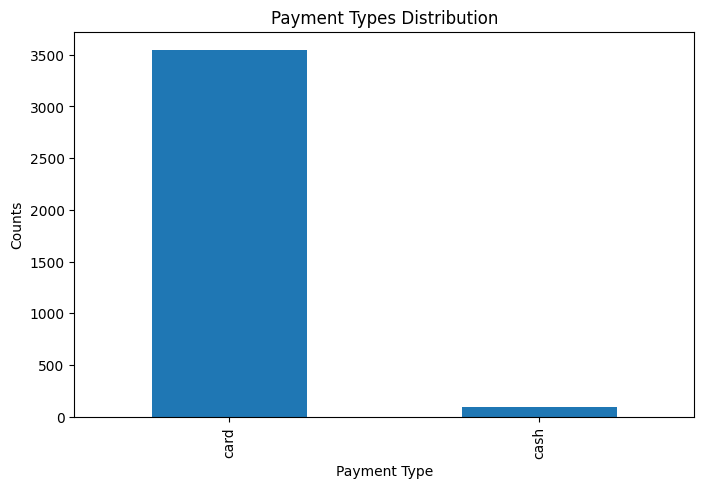

In [ ]:
cash_type_Sales = data["cash_type"].value_counts()
plt.figure(figsize=(8,5))
cash_type_Sales.plot(kind = "bar")
plt.title("Payment Types Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Counts")
plt.show()

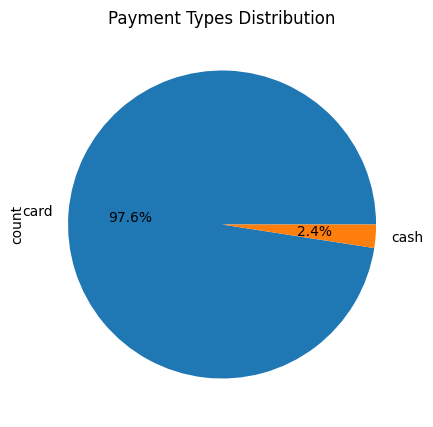

In [ ]:
plt.figure(figsize=(10,5))
cash_type_Sales.plot(kind = "pie",autopct="%1.1f%%")
plt.title("Payment Types Distribution")
plt.show()

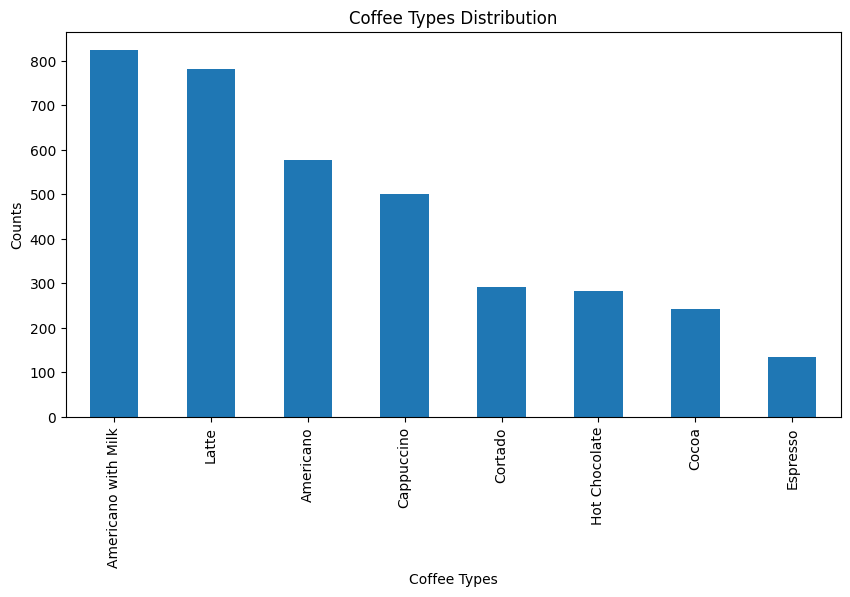

In [ ]:
coffee_types = data["coffee_name"].value_counts()
plt.figure(figsize=(10,5))
coffee_types.plot(kind = "bar")
plt.title("Coffee Types Distribution")
plt.xlabel("Coffee Types")
plt.ylabel("Counts")
plt.show()

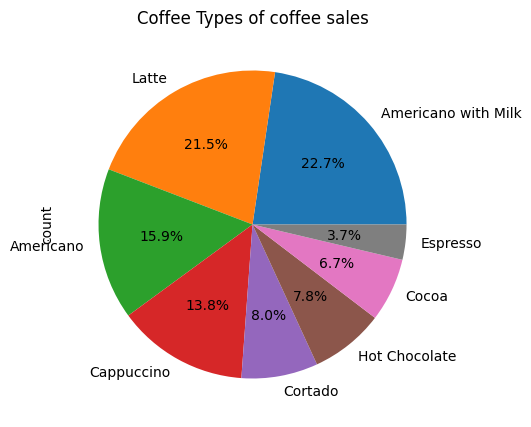

In [ ]:
plt.figure(figsize=(10,5))
coffee_types.plot(kind = "pie",autopct = "%1.1f%%")
plt.title("Coffee Types of coffee sales")
plt.show()


In [ ]:
Total_Earnings = data["money"].sum()
Total_Earnings
grouped = data.groupby("coffee_name")["money"].sum()
print((grouped/Total_Earnings)*100)



coffee_name
Americano              13.048648
Americano with Milk    21.890994
Cappuccino             15.623229
Cocoa                   7.518012
Cortado                 6.527555
Espresso                2.438050
Hot Chocolate           8.812545
Latte                  24.140967
Name: money, dtype: float64


In [ ]:
#using additive decomposition as the seasonality is constant
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(daily_sale,model="additive",period=7)
